In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('C:/Users/sheth/Downloads/heart.csv')

### Data Exploration.

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [6]:
df.describe

<bound method NDFrame.describe of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [9]:
for i in df.columns:
    print(i, ':-')
    print(df[i].value_counts(dropna=False))
    print('------*-------')

Age :-
54    51
58    42
55    41
57    38
56    38
52    36
62    35
59    35
51    35
53    33
60    32
48    31
61    31
63    30
50    25
43    24
46    24
41    24
64    22
49    21
65    21
47    19
44    19
45    18
42    18
38    16
67    15
39    15
69    13
40    13
66    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
32     5
71     5
72     4
75     3
29     3
76     2
77     2
33     2
31     2
73     1
30     1
28     1
Name: Age, dtype: int64
------*-------
Sex :-
M    725
F    193
Name: Sex, dtype: int64
------*-------
ChestPainType :-
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
------*-------
RestingBP :-
120    132
130    118
140    107
110     58
150     55
      ... 
113      1
117      1
127      1
129      1
0        1
Name: RestingBP, Length: 67, dtype: int64
------*-------
Cholesterol :-
0      172
254     11
223     10
220     10
211      9
      ... 
117      1
123      1
131      1
293      1
603      1
Nam

In [10]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Data Visualization

In [11]:
import seaborn as sns

In [12]:
corr=df.corr()

<AxesSubplot:>

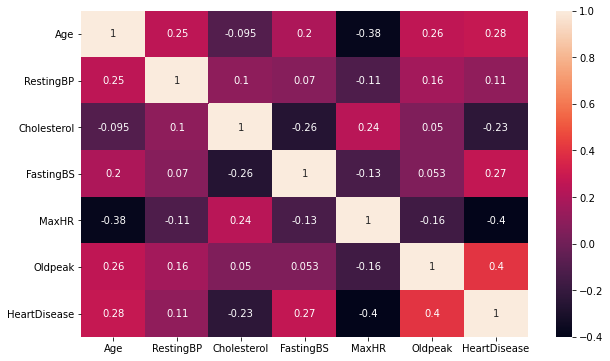

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

(array([410.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 508.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

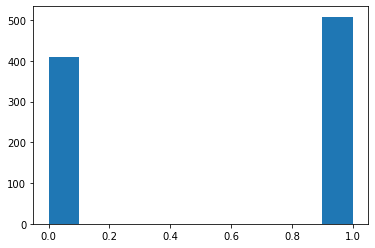

In [14]:
plt.hist(df['HeartDisease'])

In [15]:
df_class=df[:]

In [16]:
df_class.HeartDisease.astype('float')

0      0.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
913    1.0
914    1.0
915    1.0
916    1.0
917    0.0
Name: HeartDisease, Length: 918, dtype: float64

In [17]:
df_cat=df_class[df_class.select_dtypes(include=['object']).columns.tolist()]

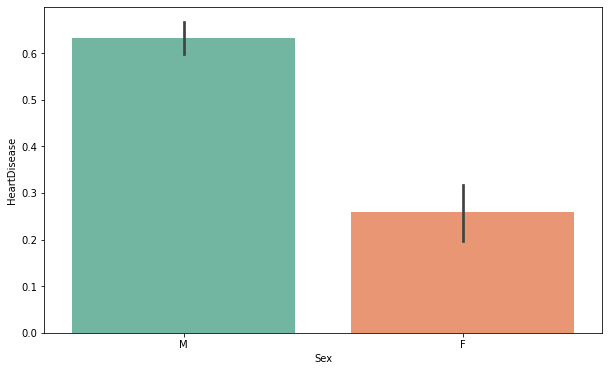

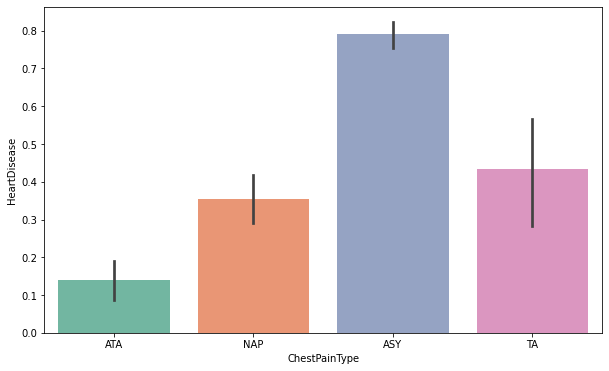

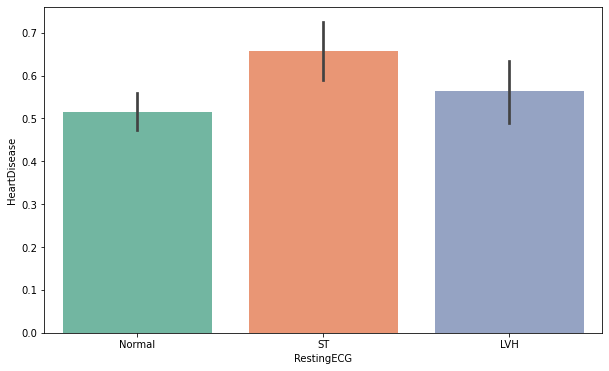

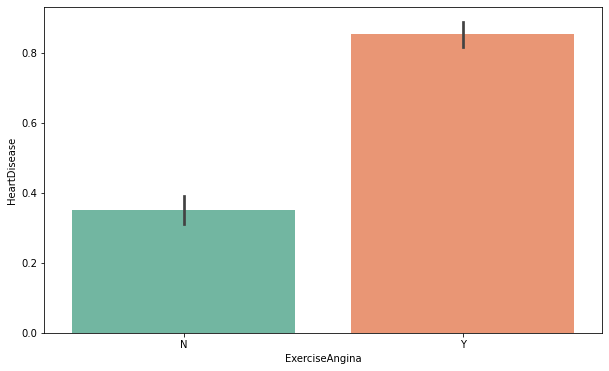

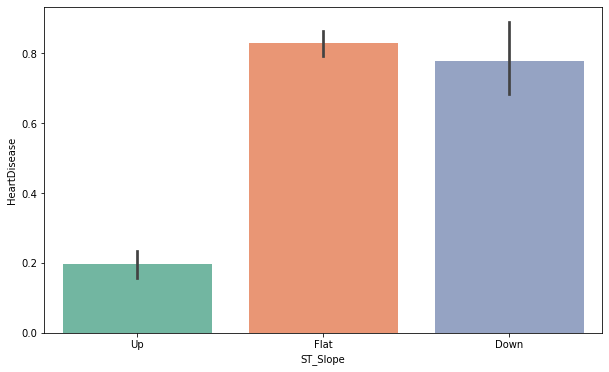

In [18]:
for variables in df_cat:
    plt.figure(figsize=(10,6))
    sns.barplot(variables,'HeartDisease', data=df_class, palette='Set2') 

#### Observations :-
1. More people from the tests have heart disease according to the data set.
2. There are more males that have heart disease compared to the females.
3. The people who have ASY type chest pains are the majority of people having a heart disease.
4. People with ST segment depression are mostly the ones having heart disease.
5. People with excercise angina are the ones tht mostly have heart disease.
6. the ones whose ST slope are flat are the ones who mostly have heart disease.

### Data Pre-Processing

In [19]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [20]:
New_Stats = df
data = pd.get_dummies(New_Stats["Sex"])

In [21]:
data.head(5)

,F,M
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


In [22]:
New_Stats.drop('Sex', axis='columns')

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### Label Encoding

In [23]:
le = LabelEncoder()
label_Sex = le.fit_transform(df["Sex"])
label_ChestPainType = le.fit_transform(df["ChestPainType"])
label_RestingECG = le.fit_transform(df["RestingECG"])
label_ExerciseAngina = le.fit_transform(df["ExerciseAngina"])
label_STSlope = le.fit_transform(df["ST_Slope"])

In [24]:
le.classes_

array(['Down', 'Flat', 'Up'], dtype=object)

In [25]:
data = df.drop("Sex", axis='columns')
data["Sex"] = label_Sex 
data.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex
0,40,ATA,140,289,0,Normal,172,N,0.0,Up,0,1
1,49,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0
2,37,ATA,130,283,0,ST,98,N,0.0,Up,0,1
3,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0
4,54,NAP,150,195,0,Normal,122,N,0.0,Up,0,1


In [26]:
data = data.drop("ChestPainType", axis='columns')
data["ChestPainType"] = label_ChestPainType
data.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex,ChestPainType
0,40,140,289,0,Normal,172,N,0.0,Up,0,1,1
1,49,160,180,0,Normal,156,N,1.0,Flat,1,0,2
2,37,130,283,0,ST,98,N,0.0,Up,0,1,1
3,48,138,214,0,Normal,108,Y,1.5,Flat,1,0,0
4,54,150,195,0,Normal,122,N,0.0,Up,0,1,2


In [27]:
data = data.drop("RestingECG", axis='columns')
data["RestingECG"] = label_RestingECG
data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex,ChestPainType,RestingECG
0,40,140,289,0,172,N,0.0,Up,0,1,1,1
1,49,160,180,0,156,N,1.0,Flat,1,0,2,1
2,37,130,283,0,98,N,0.0,Up,0,1,1,2
3,48,138,214,0,108,Y,1.5,Flat,1,0,0,1
4,54,150,195,0,122,N,0.0,Up,0,1,2,1


In [28]:
data = data.drop("ExerciseAngina", axis='columns')
data["ExerciseAngina"] = label_RestingECG
data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex,ChestPainType,RestingECG,ExerciseAngina
0,40,140,289,0,172,0.0,Up,0,1,1,1,1
1,49,160,180,0,156,1.0,Flat,1,0,2,1,1
2,37,130,283,0,98,0.0,Up,0,1,1,2,2
3,48,138,214,0,108,1.5,Flat,1,0,0,1,1
4,54,150,195,0,122,0.0,Up,0,1,2,1,1


In [29]:
data = data.drop("ST_Slope", axis='columns')
data["ST_Slope"] = label_STSlope
data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,40,140,289,0,172,0.0,0,1,1,1,1,2
1,49,160,180,0,156,1.0,1,0,2,1,1,1
2,37,130,283,0,98,0.0,0,1,1,2,2,2
3,48,138,214,0,108,1.5,1,0,0,1,1,1
4,54,150,195,0,122,0.0,0,1,2,1,1,2


In [30]:
data = data[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope','HeartDisease']]
data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,40,140,289,0,172,0.0,1,1,1,1,2,0
1,49,160,180,0,156,1.0,0,2,1,1,1,1
2,37,130,283,0,98,0.0,1,1,2,2,2,0
3,48,138,214,0,108,1.5,0,0,1,1,1,1
4,54,150,195,0,122,0.0,1,2,1,1,2,0


### Train_Test Data Split

In [31]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
x = data.drop(['HeartDisease'], axis=1, inplace=False)
y = data["HeartDisease"]

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state =5)

In [33]:
len(x_test)

184

### LOGISTIC REGRESSION

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr=LogisticRegression()

In [36]:
lr.fit(x_train,y_train)

LogisticRegression()

In [37]:
y_pred=lr.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score

In [39]:
accuracy = accuracy_score(y_test, y_pred)

In [40]:
f1 = f1_score(y_test, y_pred, average=None)

In [41]:
precision = precision_score(y_test, y_pred, average=None)

In [42]:
recall = recall_score(y_test, y_pred, average=None)

In [43]:
print("Accuracy is:",accuracy)
print("F1 score is:",f1)
print("Precision score is:",precision)
print("Recall score is:",recall)

Accuracy is: 0.8967391304347826
F1 score is: [0.87581699 0.91162791]
Precision score is: [0.8375     0.94230769]
Recall score is: [0.91780822 0.88288288]


In [44]:
lr2=LogisticRegression(max_iter=1000)

In [45]:
lr2.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [46]:
y_pred2 = lr2.predict(x_test)

In [47]:
accuracy2 = accuracy_score(y_test, y_pred2)
f12 = f1_score(y_test, y_pred2, average=None)
precision2 = precision_score(y_test, y_pred2, average=None)
recall2 = recall_score(y_test, y_pred2, average=None)

In [48]:
print("Accuracy is:",accuracy2)
print("F1 score is:",f12)
print("Precision score is:",precision2)
print("Recall score is:",recall2)

Accuracy is: 0.9021739130434783
F1 score is: [0.88157895 0.91666667]
Precision score is: [0.84810127 0.94285714]
Recall score is: [0.91780822 0.89189189]


In [49]:
lr2.score(x_test,y_test)*100

90.21739130434783

Text(0, 0.5, ' ')

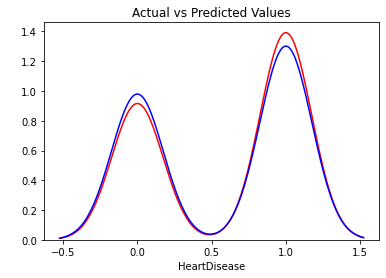

In [50]:
ax1 = sns.distplot(y_test, hist=False, color='r', label='Actual Values')
sns.distplot(y_pred2, hist=False, color='b', label='Predicted Values', ax=ax1)
plt.title('Actual vs Predicted Values')
plt.ylabel(' ')

In [51]:
len(y_pred2)

184

Text(0.5, 0, 'HeartDisease')

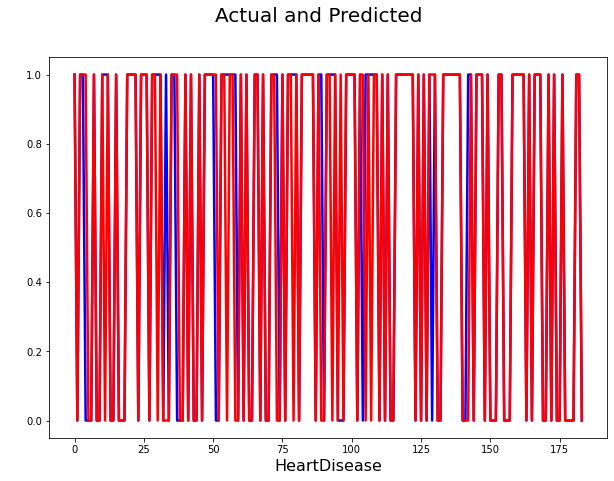

In [52]:
c = [i for i in range(184)]
fig = plt.figure(figsize=(10,7))
plt.plot(c,y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c,y_pred2, color='red', linewidth=2.5, linestyle='-')
fig.suptitle('Actual and Predicted', fontsize=20)
plt.ylabel(' ', fontsize=16)
plt.xlabel('HeartDisease', fontsize=16)

### Confusion Matrix For Logistic Regression ( Model 2 )

[[67  6]
 [12 99]]


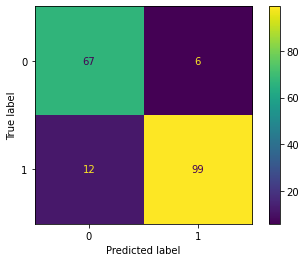

In [53]:
cf_matrix = confusion_matrix(y_test, y_pred2)
print(cf_matrix)
disp = ConfusionMatrixDisplay(cf_matrix, display_labels = lr2.classes_ )
disp.plot()
plt.show()

### Decision Tree Model

In [54]:
from sklearn import tree

In [55]:
dt = tree.DecisionTreeClassifier(random_state=123)

In [56]:
y_train.isna().sum()

0

In [57]:
x_train.shape

(734, 11)

In [58]:
y_train.dtype

dtype('int64')

In [59]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=123)

In [60]:
y_pred = dt.predict(x_test)

In [61]:
y_pred[0:5]

array([1, 1, 1, 1, 0], dtype=int64)

In [62]:
y_pred=y_pred.astype(np.number)

In [63]:
y_test=y_test.astype(np.number)

In [64]:
from sklearn import metrics

In [65]:
print('Accuracy', metrics.accuracy_score(y_test, y_pred))

Accuracy 0.7663043478260869


In [66]:
print('Precision', metrics.precision_score(y_test, y_pred))

Precision 0.8148148148148148


In [67]:
print('Recall', metrics.recall_score(y_test,y_pred))

Recall 0.7927927927927928


In [68]:
len(y_pred)

184

In [69]:
len(y_test)

184

#### Hyperparameter Tuning

In [70]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [71]:
import graphviz
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

In [72]:
import pydotplus

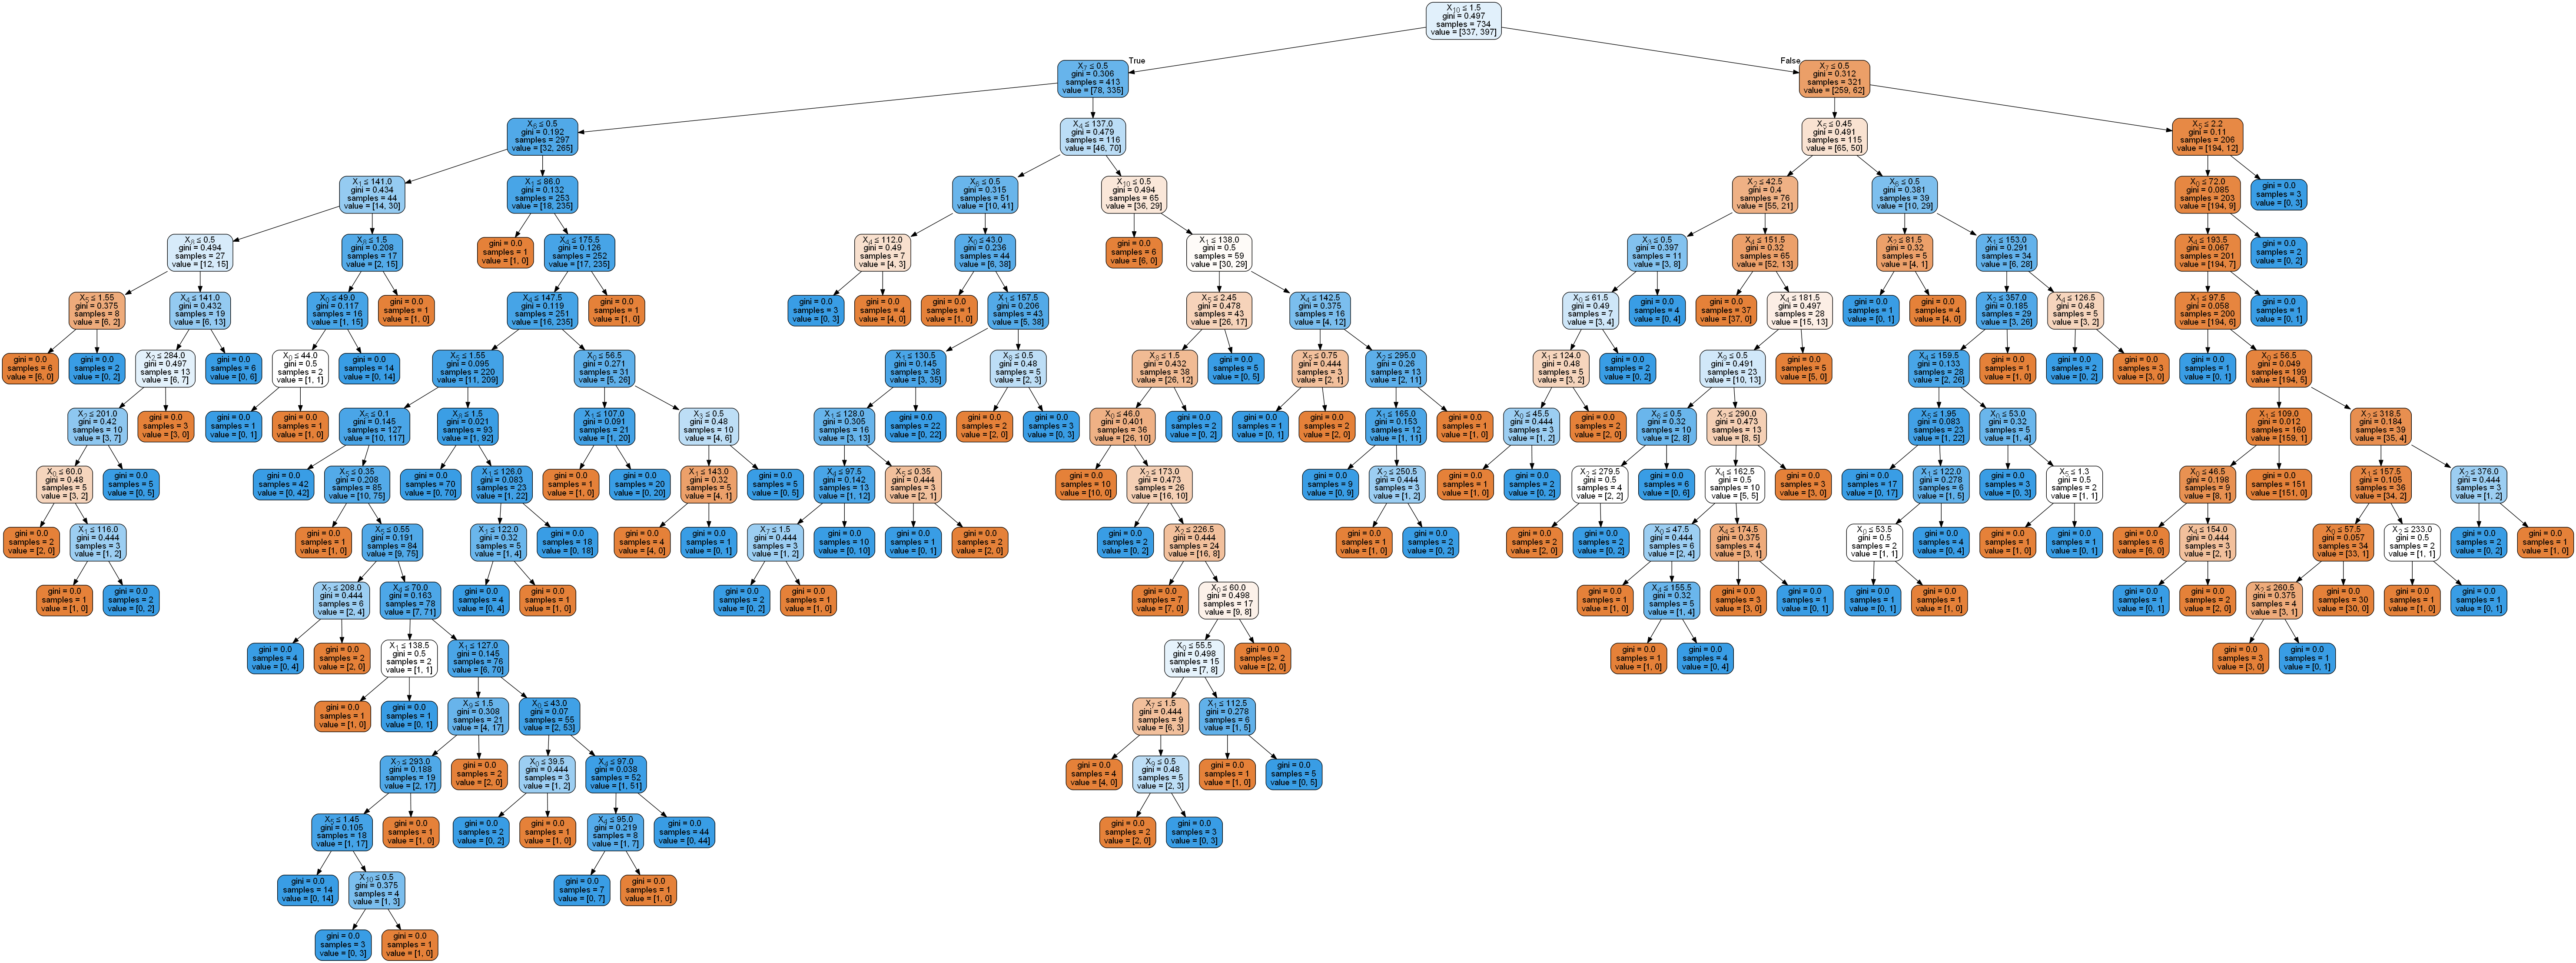

In [73]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graphviz.Source(graph)
Image(graph.create_png())

In [74]:
from time import time

In [75]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [76]:
def report(results, n_top=3):
    for i in range(1, n_top+1):
        patients=np.flatnonzero(results['rank_test_score'] == i)
        for patient in patients:
            print('Model with rank: {0}' .format(i))
            print(' Mean validation score: {0: .3f} (std: {1: .3f})' .format(results['mean_test_score'][patient],
                                                                            results['std_test_score'][patient]))
            print('Paramters: {0}' .format(results['params'][patient]))
            print("")

In [77]:
param_dist = {"max_depth": [3, None],
             "max_features": sp_randint(1,11),
             "min_samples_split": sp_randint(2,11),
             "criterion": ["gini", "entropy"]}

In [78]:
n_iter_search = 20
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=n_iter_search, cv=5)

In [79]:
start = time()
random_search.fit(x_train, y_train)
print("Randomized search too %.2f seconds for %d candidates" "parameter settings." %((time()-start), n_iter_search))
report(random_search.cv_results_)

Randomized search too 1.12 seconds for 20 candidatesparameter settings.
Model with rank: 1
 Mean validation score:  0.842 (std:  0.033)
Paramters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'min_samples_split': 10}

Model with rank: 1
 Mean validation score:  0.842 (std:  0.033)
Paramters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'min_samples_split': 4}

Model with rank: 1
 Mean validation score:  0.842 (std:  0.033)
Paramters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'min_samples_split': 9}



In [80]:
param_grid = {'max_depth': [3,None,4,5,],
             'max_features': [1,2,3,4,5,6,7,8,9,10],
              'max_leaf_nodes': [8,9,10],
              'min_samples_leaf': [4,5,6,7],
             'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12],
             "criterion": ['gini', 'entropy']}

In [81]:
grid_search = GridSearchCV(dt, param_grid=param_grid, cv=5)

In [82]:
start=time()
grid_search.fit(x_train, y_train)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings. "
      %(time()-start,len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

GridSearchCV took 579.06 seconds for 10560 candidate parameter settings. 
Model with rank: 1
 Mean validation score:  0.842 (std:  0.031)
Paramters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'max_leaf_nodes': 8, 'min_samples_leaf': 4, 'min_samples_split': 2}

Model with rank: 1
 Mean validation score:  0.842 (std:  0.031)
Paramters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'max_leaf_nodes': 8, 'min_samples_leaf': 4, 'min_samples_split': 3}

Model with rank: 1
 Mean validation score:  0.842 (std:  0.031)
Paramters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'max_leaf_nodes': 8, 'min_samples_leaf': 4, 'min_samples_split': 4}

Model with rank: 1
 Mean validation score:  0.842 (std:  0.031)
Paramters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'max_leaf_nodes': 8, 'min_samples_leaf': 4, 'min_samples_split': 5}

Model with rank: 1
 Mean validation score:  0.842 (std:  0.031)
Paramters: {'criterion': 'entropy'

In [83]:
Paramters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'max_leaf_nodes': 8, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [84]:
dt_grid_search = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = None, max_features = 7, max_leaf_nodes = 8, min_samples_leaf = 4, min_samples_split = 2)

In [85]:
dt_grid_search.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_features=7, max_leaf_nodes=8,
                       min_samples_leaf=4)

In [86]:
y_pred_g = dt_grid_search.predict(x_test)

In [87]:
print('Accuracy', metrics.accuracy_score(y_test, y_pred_g))
print('Precision', metrics.precision_score(y_test, y_pred_g))
print('Recall', metrics.recall_score(y_test,y_pred_g))

Accuracy 0.8641304347826086
Precision 0.9574468085106383
Recall 0.8108108108108109


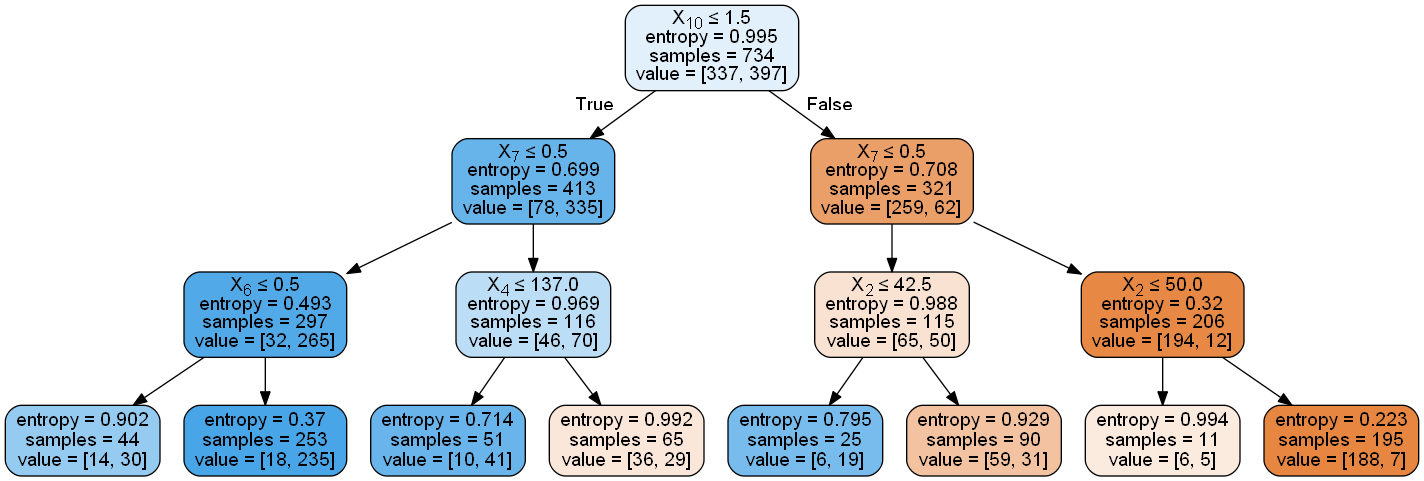

In [88]:
dot_data = StringIO()
export_graphviz(dt_grid_search, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graphviz.Source(graph)
Image(graph.create_png())

### Confusion Matrix Decision Tree

[[69  4]
 [21 90]]


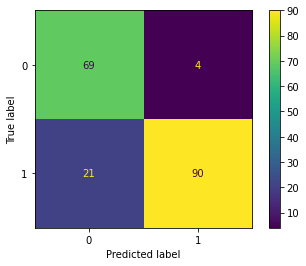

In [89]:
cf_matrix = confusion_matrix(y_test, y_pred_g)
print(cf_matrix)
disp = ConfusionMatrixDisplay(cf_matrix, display_labels = lr2.classes_ )
disp.plot()
plt.show()

### Random Forest Classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rf=RandomForestClassifier()

In [92]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [93]:
ypred=rf.predict(x_test)

In [94]:
print(ypred.shape)
print(ypred[0:5])

(184,)
[1 0 1 1 0]


In [95]:
rf.feature_importances_

array([0.08958281, 0.07707867, 0.10866913, 0.02300276, 0.12711517,
       0.13142254, 0.03731411, 0.12950913, 0.02146399, 0.02268732,
       0.23215437])

In [96]:
import matplotlib.pyplot as plt

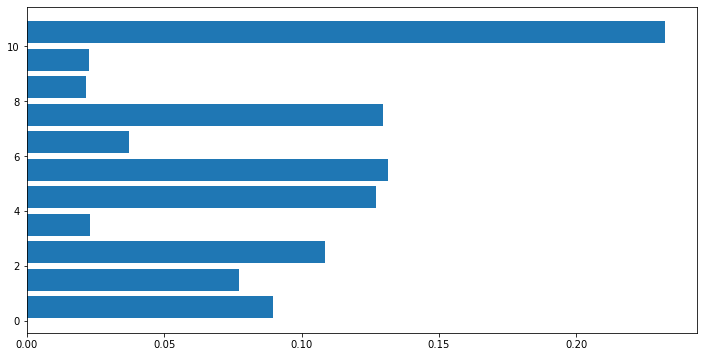

In [97]:
feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange (sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance, align='center')

plt.show()

In [98]:
from sklearn import metrics

In [99]:
print('Accuracy', metrics.accuracy_score(y_test, ypred))
print('Precision', metrics.precision_score(y_test, ypred))
print('Recall', metrics.recall_score(y_test,ypred))

Accuracy 0.9021739130434783
Precision 0.9345794392523364
Recall 0.9009009009009009


In [100]:
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [101]:
def report(results, n_top=3):
    for i in range(1, n_top+1):
        candidates=np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print('Model with rank: {0}' .format(i))
            print(' Mean validation score: {0: .3f} (std: {1: .3f})' .format(results['mean_test_score'][candidate],
                                                                            results['std_test_score'][candidate]))
            print('Paramters: {0}' .format(results['params'][candidate]))
            print("")

In [102]:
param_dist = {"max_depth": [3, None],
             "max_features": sp_randint(1,11),
             "min_samples_split": sp_randint(2,11),
              "bootstrap": [True,False],
             "criterion": ["gini", "entropy"]}

In [103]:
n_iter_search = 20
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=n_iter_search, cv=5)

In [104]:
start = time()
random_search.fit(x_train, y_train)
print("Randomized search too %.2f seconds for %d candidates" "parameter settings." %((time()-start), n_iter_search))
report(random_search.cv_results_)

Randomized search too 35.83 seconds for 20 candidatesparameter settings.
Model with rank: 1
 Mean validation score:  0.856 (std:  0.029)
Paramters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 2, 'min_samples_split': 3}

Model with rank: 2
 Mean validation score:  0.852 (std:  0.034)
Paramters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 2, 'min_samples_split': 2}

Model with rank: 3
 Mean validation score:  0.852 (std:  0.033)
Paramters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_split': 6}



In [105]:
Paramters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 2, 'min_samples_split': 3}

In [106]:
rf_rand_search = RandomForestClassifier(bootstrap = False, criterion = 'entropy', max_depth = 3, max_features = 2, min_samples_split = 3)

In [107]:
rf_rand_search.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=3,
                       max_features=2, min_samples_split=3)

In [108]:
ypred2 = rf_rand_search.predict(x_test)

In [109]:
print('Accuracy', metrics.accuracy_score(y_test, ypred2))
print('Precision', metrics.precision_score(y_test, ypred2))
print('Recall', metrics.recall_score(y_test,ypred2))

Accuracy 0.907608695652174
Precision 0.9351851851851852
Recall 0.9099099099099099


In [110]:
start=time()
grid_search.fit(x_train, y_train)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings. "
      %(time()-start,len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

GridSearchCV took 526.33 seconds for 10560 candidate parameter settings. 
Model with rank: 1
 Mean validation score:  0.842 (std:  0.031)
Paramters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'max_leaf_nodes': 8, 'min_samples_leaf': 4, 'min_samples_split': 2}

Model with rank: 1
 Mean validation score:  0.842 (std:  0.031)
Paramters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'max_leaf_nodes': 8, 'min_samples_leaf': 4, 'min_samples_split': 3}

Model with rank: 1
 Mean validation score:  0.842 (std:  0.031)
Paramters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'max_leaf_nodes': 8, 'min_samples_leaf': 4, 'min_samples_split': 4}

Model with rank: 1
 Mean validation score:  0.842 (std:  0.031)
Paramters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'max_leaf_nodes': 8, 'min_samples_leaf': 4, 'min_samples_split': 5}

Model with rank: 1
 Mean validation score:  0.842 (std:  0.031)
Paramters: {'criterion': 'entropy'

In [111]:
Paramters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'max_leaf_nodes': 8, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [112]:
rf_grid_search = RandomForestClassifier(criterion = 'entropy', max_depth = None, max_features = 7, max_leaf_nodes = 8, min_samples_leaf = 4, min_samples_split = 2)

In [113]:
rf_grid_search.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_features=7, max_leaf_nodes=8,
                       min_samples_leaf=4)

In [114]:
ypred3 = rf_grid_search.predict(x_test)

In [115]:
print('Accuracy', metrics.accuracy_score(y_test, ypred3))
print('Precision', metrics.precision_score(y_test, ypred3))
print('Recall', metrics.recall_score(y_test,ypred3))

Accuracy 0.8913043478260869
Precision 0.9026548672566371
Recall 0.918918918918919


### Confusion Matrix Random Forest 1st Model 

[[67  6]
 [12 99]]


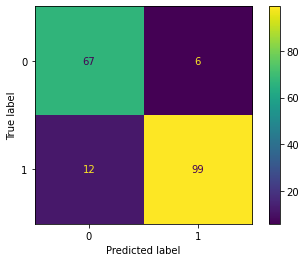

In [116]:
cf_matrix = confusion_matrix(y_test, y_pred2)
print(cf_matrix)
disp = ConfusionMatrixDisplay(cf_matrix, display_labels = lr2.classes_ )
disp.plot()
plt.show()

### Gradient Boosting

In [117]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance

In [118]:
params= {'n_estimators': 100,  'max_depth': None, 'max_features': 7, 'max_leaf_nodes': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'loss': 'ls'}

In [119]:
reg=ensemble.GradientBoostingRegressor(**params)
reg.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=None, max_features=7, max_leaf_nodes=8,
                          min_samples_leaf=4)

In [120]:
mse=mean_squared_error(y_test, reg.predict(x_test))
print(" The mean square error (MSE) on test set: {:4f}".format(mse))

 The mean square error (MSE) on test set: 0.084842


In [121]:
test_score=np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(x_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

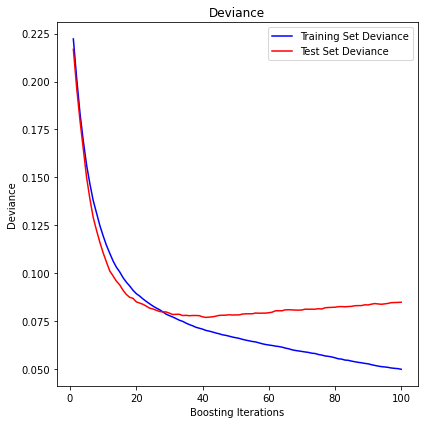

In [122]:
fig=plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-', label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-', label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

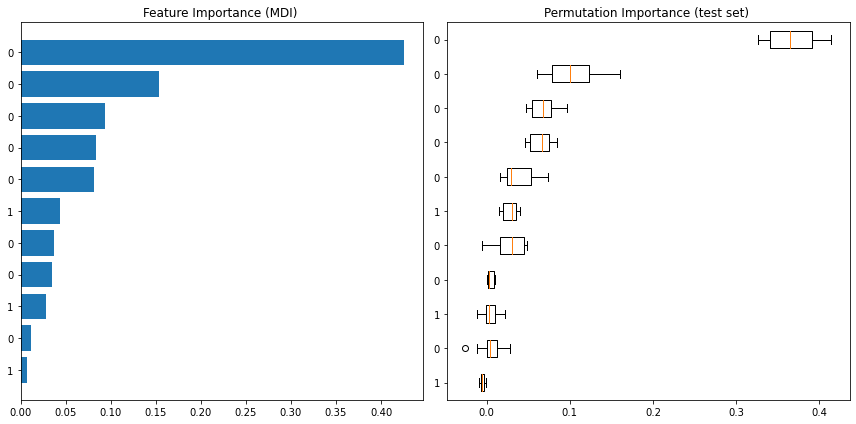

In [123]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(df['HeartDisease'])[sorted_idx])
plt.title("Feature Importance (MDI) " )

result = permutation_importance(reg, x_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(df['HeartDisease'])[sorted_idx])
plt.title("Permutation Importance (test set) ")
fig.tight_layout()

### Boosting Classifier

In [124]:
from sklearn.ensemble import GradientBoostingClassifier

In [125]:
from sklearn.metrics import classification_report

In [126]:
gradient_booster = GradientBoostingClassifier ( learning_rate=0.1 )
gradient_booster.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [127]:
gradient_booster.fit(x_train, y_train)
print(classification_report(y_test,gradient_booster.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88        73
         1.0       0.92      0.93      0.92       111

    accuracy                           0.91       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.91      0.91      0.91       184



In [128]:
params1 = {'n_estimators': 100,  'max_depth': None, 'max_features': 7, 'max_leaf_nodes': 8, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [129]:
gradient_booster = GradientBoostingClassifier ( learning_rate=0.1 , **params1)

In [130]:
gradient_booster.fit(x_train, y_train)
print(classification_report(y_test,gradient_booster.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88        73
         1.0       0.92      0.93      0.92       111

    accuracy                           0.91       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.91      0.91      0.91       184



### Adaboost Classifier

In [131]:
from sklearn.ensemble import AdaBoostClassifier

In [132]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)

In [133]:
y=y.astype(np.number)

In [134]:
clf.fit(x, y)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [135]:
clf.predict([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

array([1.])

In [136]:
clf.score(x, y)

0.8910675381263616

### SVM

In [137]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)

In [138]:
confusion_matrix(y_test, pred_svc)

array([[54, 19],
       [32, 79]], dtype=int64)

In [139]:
print(classification_report(pred_svc , y_test))

              precision    recall  f1-score   support

           0       0.74      0.63      0.68        86
           1       0.71      0.81      0.76        98

    accuracy                           0.72       184
   macro avg       0.73      0.72      0.72       184
weighted avg       0.72      0.72      0.72       184



#### Tuning Hyperparameters

In [140]:
svm = SVC(kernel='linear')

In [141]:
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [142]:
pred = svm.predict(x_test)

In [143]:
confusion_matrix(y_test, pred)

array([[ 64,   9],
       [  9, 102]], dtype=int64)

In [144]:
accuracy_score(y_test, pred)

0.9021739130434783

In [145]:
svm = SVC(kernel='sigmoid')

In [146]:
svm.fit(x_train, y_train)

SVC(kernel='sigmoid')

In [147]:
pred = svm.predict(x_test)

In [148]:
confusion_matrix(y_test, pred)

array([[34, 39],
       [36, 75]], dtype=int64)

In [149]:
accuracy_score(y_test, pred)

0.592391304347826

#### Confusion Matrix SVM kernel=linear model

[[34 39]
 [36 75]]


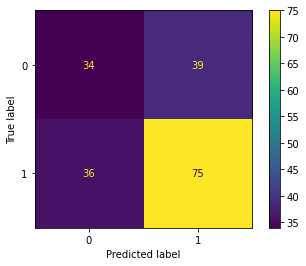

In [150]:
cf_matrix = confusion_matrix(y_test, pred)
print(cf_matrix)
disp = ConfusionMatrixDisplay(cf_matrix, display_labels = lr2.classes_ )
disp.plot()
plt.show()

# -

### Result :-
#### A. From all the tests above we can see that the model built after hyperparameter tuning and then using Boosting Classifier method gives us the best model with 0.91 accuracy and 0.93 Recall. Creating a confusion matrix with the best model.

In [151]:
y2= gradient_booster.predict(x_test)

In [152]:
print(classification_report(y_test, y2))

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88        73
         1.0       0.92      0.93      0.92       111

    accuracy                           0.91       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.91      0.91      0.91       184



[[ 64   9]
 [  8 103]]


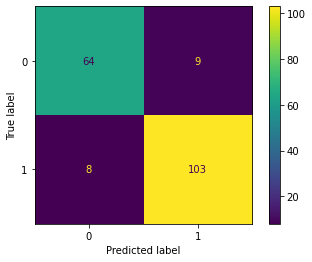

In [153]:
cf_matrix = confusion_matrix(y_test, y2)
print(cf_matrix)
disp = ConfusionMatrixDisplay(cf_matrix, display_labels = lr2.classes_ )
disp.plot()
plt.show()

#### B. From the Confusion Matrix the data we can infer is:
1. True-Positives: 103.
2. True-Negative: 64.
3. False-Positives: 9.
4. False-Negative: 8.

# X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X